In [36]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [45]:
x = np.linspace(-5.0,5.0,10000)
mu = 0
sigma = 1
number_of_samples = 5000
samples = np.random.normal(mu,sigma,number_of_samples)
samples.sort()

In [46]:
sample_mean = np.mean(samples)
sample_std = np.std(samples)

In [47]:
# Probability Distribution Function
# 確率分布の正解例
true_distribution = stats.norm.pdf(x,mu,sigma)

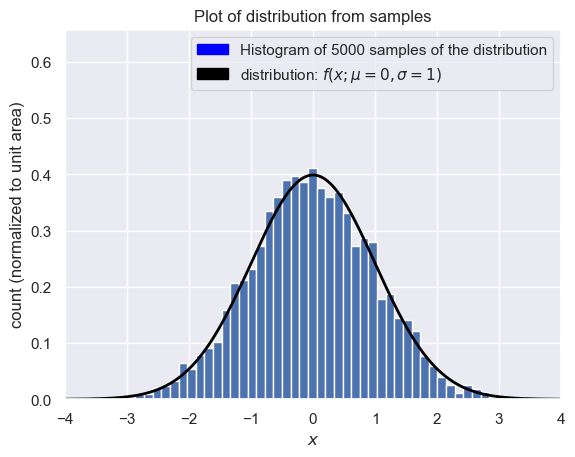

In [48]:
n_bins = 1
if number_of_samples < 50:
    n_bins = number_of_samples
else:
    n_bins = 50

# Plots
plt.figure(1)

# Plot histogram of samples
hist_count, bins, _ = plt.hist(
    samples, n_bins, density=True
)  # Norm to keep distribution in view
# Plot distribution using sample parameters
plt.plot(x, true_distribution, linewidth=2, color="black")

# Axes
plt.title("Plot of distribution from samples")
plt.xlabel("$x$")
plt.ylabel("count (normalized to unit area)")
sample_window_w = sample_std * 1.5
# plt.xlim([sample_mean - sample_window_w, sample_mean + sample_window_w])
plt.xlim([-4, 4])
plt.ylim([0, hist_count.max() * 1.6])

# Legends
sample_patch = mpatches.Patch(
    color="black", label=fr"distribution: $f(x;\mu={mu},\sigma={sigma})$"
)
data_patch = mpatches.Patch(
    color="blue",
    label=f"Histogram of {number_of_samples} samples of the distribution",
)

plt.legend(handles=[data_patch, sample_patch])

plt.show()
# print(samples)

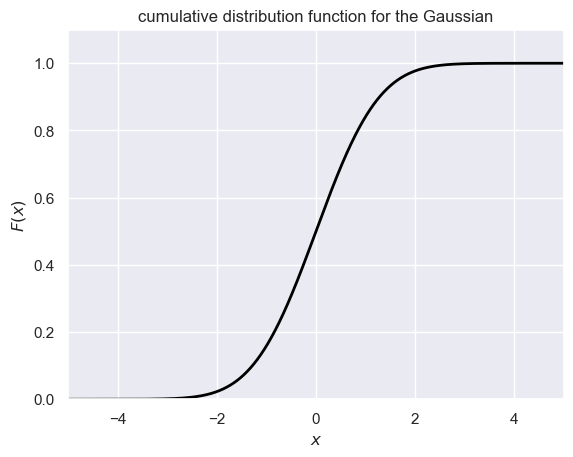

In [49]:
plt.figure(1)

# Cumulative distribution function
# 累積分布関数
plt.plot(x,stats.norm.cdf(x),linewidth=2,color="black")
plt.title("cumulative distribution function for the Gaussian")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")

plt.xlim([-5, 5])
plt.ylim([0, 1.1])

plt.show()

In [52]:
# 累積分布関数
output = stats.norm.cdf(samples)

In [55]:
# Probability Density Function
# 確率密度関数
# これが答え
uniform_distribution = stats.uniform.pdf(x)

In [ ]:
# histのdensityがTrueのとき
# (binに対応するデータの個数) / (全データ数 * bin幅)
# (binに対応するデータの個数) / (5000 * 1/50)
# 100個binに当てはまるデータがあったら1になる

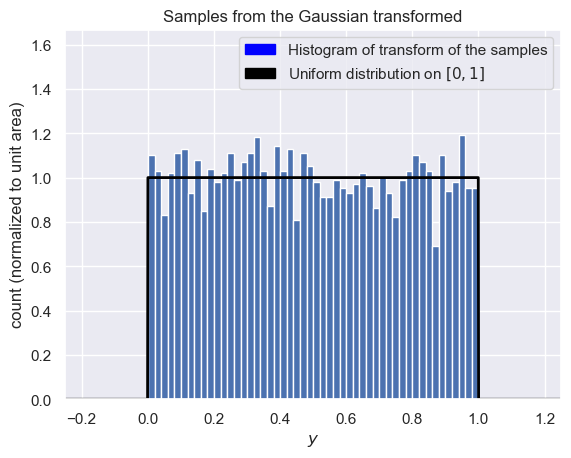

In [63]:
plt.figure(1)
hist_count,bins,_ = plt.hist(output,n_bins,density=True)
plt.plot(x,uniform_distribution,linewidth=2,color="black")

plt.title("Samples from the Gaussian transformed")
plt.xlabel("$y$")
plt.ylabel("count (normalized to unit area)")
plt.xlim([-0.25, 1.25])
plt.ylim([0, hist_count.max() * 1.4])

sample_patch = mpatches.Patch(
    color="black", label=f"Uniform distribution on $[{0},{1}]$"
)
data_patch = mpatches.Patch(color="blue", label="Histogram of transform of the samples")

plt.legend(handles=[data_patch, sample_patch])

plt.show()

In [ ]:
recovered = stats.norm.ppf(output)